<a href="https://colab.research.google.com/github/amd3897/Prediction-of-Product-Sales/blob/main/Prediction_of_product_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predection of Product Sales
- Aziz M Duaibes

## Project overview

### Prediction of product sales
- Potential stakeholders: Grocery stores owners
- Primary goal: Make prediction of sales to increase profit
- What do they need?: Actionable insights/recommendations for which modifications they can make to increase their profits


## Load and Inspect Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
fname = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df = pd.read_csv(fname)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df = df.set_index('Item_Identifier')
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Clean Data

- There are 8523 rows and 12 columns
- The datatypes are float(4), integer(1), string/object(7)

In [7]:
df.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [8]:
# check duplicates
df.duplicated().sum()
# no duplicated rows

0

In [9]:
# double check
df[df.duplicated()]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,


In [10]:
# identufy missing value
df.isna().sum()
# two columns have missing values (Item_Weight(float), Outlet_Size(object))

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
# fill null values for object columns
df['Outlet_Size'] = df['Outlet_Size'].fillna('MISSING')
# check number of NaN
df['Outlet_Size'].isna().sum()

0

In [12]:
# fill null values for numeric column
df['Item_Weight'] = df['Item_Weight'].fillna(-1)
# check number of NaN
df['Item_Weight'].isna().sum()

0

In [13]:
df.isna().sum()
# no null values

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [14]:
# check consistency
# object columns
object_col = df.select_dtypes('object').columns
for col in object_col:
  print(f'Value Count for {col}\n{df[col].value_counts()}\n ')
# from details below you can find that Item_Fat_content has inconsistent values

Value Count for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
 
Value Count for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
 
Value Count for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64
 
Value Count for Outlet_Size
Medium     2793
MISSING    2410
Small      2388
High        932
Name

In [15]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['LF','low fat'], 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg','Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [16]:
numeric_col = df.select_dtypes('number').columns
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Feature Inspection

In [17]:
# display numeric columns
df.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [18]:
# import all required libraries
import matplotlib.pyplot as plt
import seaborn as sns

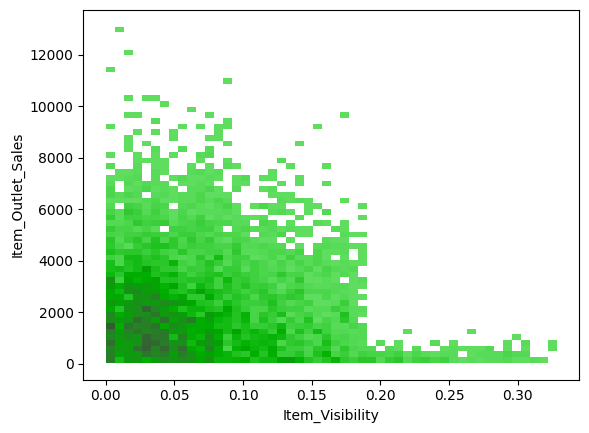

In [19]:
# Histograms to view the distributions of numerical features in your dataset
# visualize the relation between Item_Visibility and Item_Outlet_Sales
ax = sns.histplot(data=df, x='Item_Visibility', y='Item_Outlet_Sales', color='Green')

We can notice the more the item is visible the more it's likely to be sold

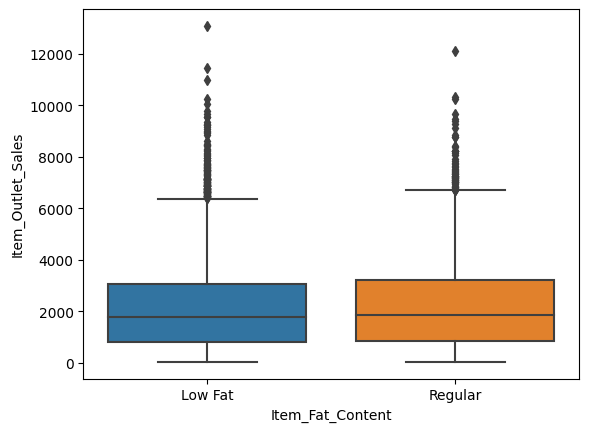

In [20]:
# Boxplots to view statistical summaries of numerical features in your dataset
# use boxplot to see if people buy products according to their fat content
ax = sns.boxplot(data=df, y='Item_Outlet_Sales', x='Item_Fat_Content')

Notice that customers don't really care about fat content, since low fat and regular fat items have nearly the same average sales, which is around 2000

In [21]:
# Countplots to view the frequency of each class of categorial features in your dataset
cat_col = df.select_dtypes('object').columns
df[cat_col].head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
Item_Identifier,,,,,,
FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
FDX07,Regular,Fruits and Vegetables,OUT010,MISSING,Tier 3,Grocery Store
NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


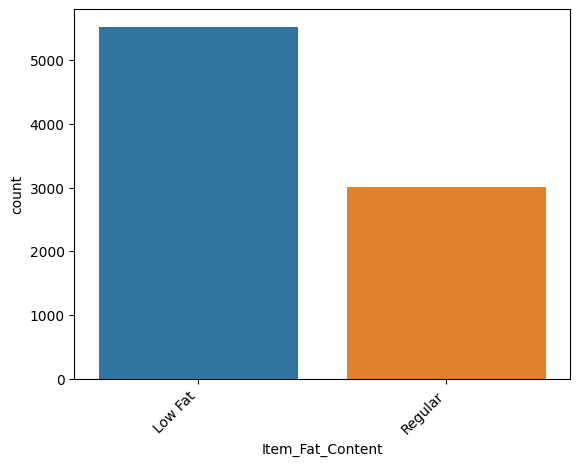

In [32]:
# use countplot
# use function
def cat_feature(col_name):
  ax = sns.countplot(data=df, x=col_name)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  return ax
cat_feature('Item_Fat_Content');

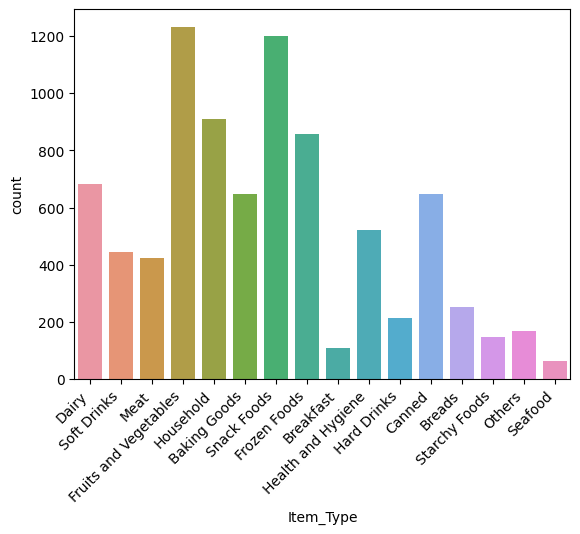

In [33]:
cat_feature('Item_Type');

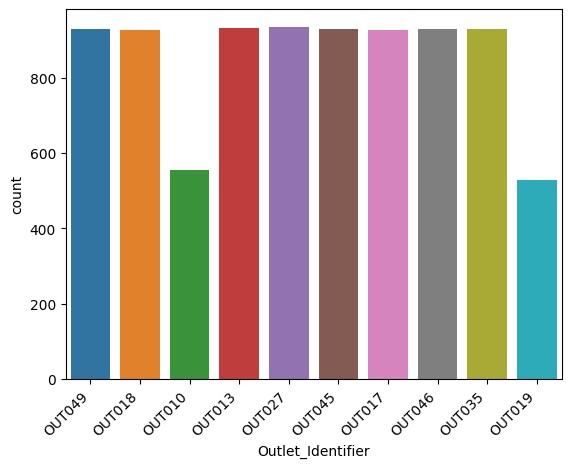

In [24]:
cat_feature('Outlet_Identifier');

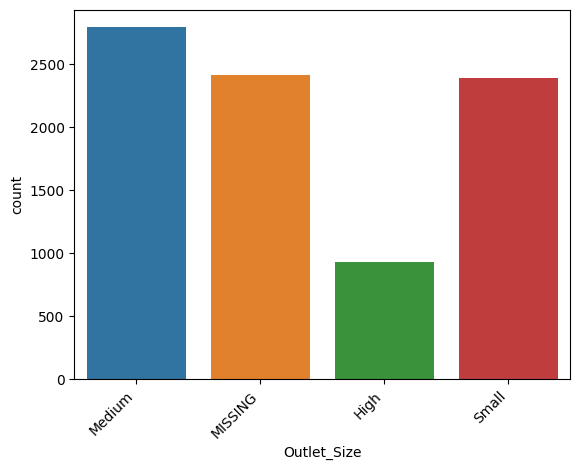

In [25]:
cat_feature('Outlet_Size');

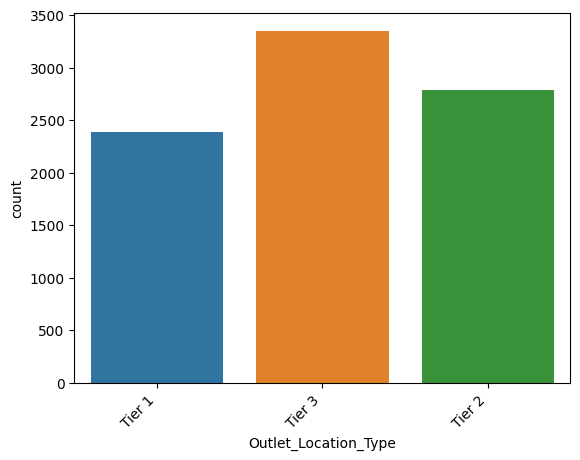

In [26]:
cat_feature('Outlet_Location_Type');

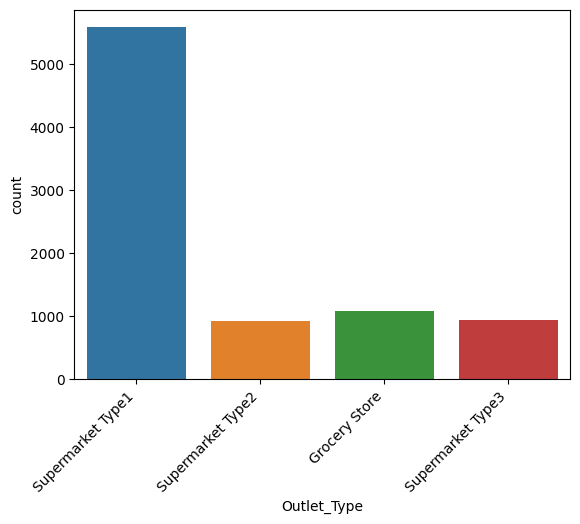

In [27]:
cat_feature('Outlet_Type');

We can see the counts for each categorical feature

<ipython-input-36-805c8b3e637e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr().round(2);


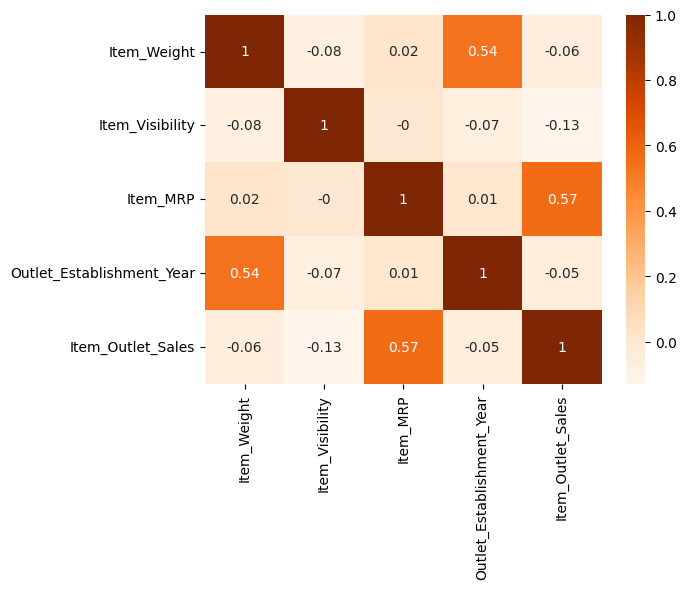

In [36]:
# Heatmap to view the correlation between features
corr = df.corr().round(2);
ax = sns.heatmap(corr, cmap='Oranges', annot=True);

Notice the strong correlations between Item_Weight & Outlet_Establishment_Year, Item_MRP & Item_Outlet_Sales

## Exploratory Data Analysis